Importing and Visualizing dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator


In [2]:
tf.__version__

'2.3.0'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

[1]


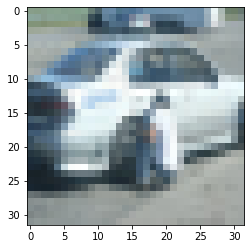

In [5]:
i = 30009
plt.imshow(x_train[i])
print(y_train[i])

Data Processing


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)

In [8]:
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.2,)
training_set = train_datagen.fit(x_train)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.fit(x_test)

Building CNN


In [11]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(tf.keras.layers.Dropout(0.4))

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))


In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
#cnn.fit(x = training_set, validation_data = test_set, epochs = 1)
history = cnn.fit(x_train, y_train, batch_size = 32, epochs = 4, shuffle = True)

Epoch 1/4
1563/1563 [==============================] - 295s 189ms/step - loss: 0.4274 - accuracy: 0.4138
Epoch 2/4
1563/1563 [==============================] - 278s 178ms/step - loss: 0.1910 - accuracy: 0.5809
Epoch 3/4
1563/1563 [==============================] - 293s 188ms/step - loss: 0.1505 - accuracy: 0.6812
Epoch 4/4
1563/1563 [==============================] - 291s 186ms/step - loss: 0.1102 - accuracy: 0.7807


In [16]:
evaluation = cnn.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 11s 34ms/step - loss: 0.2160 - accuracy: 0.5908
Test Accuracy: 0.5907999873161316


In [48]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('test_bird.jpg', target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [49]:
result = result.argmax(1)
if result == 0:
    print('Airplane')
if result == 1:
    print('Automobile')
if result == 2:
    print('Bird')
if result == 3:
    print('cat')
if result == 4:
    print('deer')
if result == 5:
    print('dog')
    
if result == 6:
    print('frog')
if result == 7:
    print('horse')
if result == 8:
    print('Ship')
if result == 9:
    print('Truck')


Bird
